In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("youtube-api")

In [2]:
channel_ids = ['UCW8Ews7tdKKkBT6GdtQaXvQ', #TechWorld with Nana
              'UCdngmbVKX1Tgre699-XLlUA', # StrataScratch
               'UCnz-ZXXER4jOvuED5trXfEA', # techTFQ\n",
'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse \n",
'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee\n",
'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst\n",
'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang\n",
]

In [3]:
from googleapiclient.discovery import build
import googleapiclient.errors
import pandas as pd

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client

youtube = build(
    api_service_name, api_version, developerKey=secret_value_0)

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id="UC_x5XG1OV2P6uZZ5FSM9Ttw"
)
response = request.execute()

print(response)


{'kind': 'youtube#channelListResponse', 'etag': 'wsTcK55SP_NaxUVx60jr_0X9TiE', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'gs049lsWOwtZVOMajHYCfS54vZ8', 'id': 'UC_x5XG1OV2P6uZZ5FSM9Ttw', 'snippet': {'title': 'Google Developers', 'description': 'The Google Developers channel features talks from events, educational series, best practices, tips, and the latest updates across our products and platforms.\n\nSubscribe to Google Developers → https://goo.gle/developers\n', 'customUrl': 'googledevelopers', 'publishedAt': '2007-08-23T00:34:43Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AKedOLSsnWm_dQzIqM-qgW74yebXNX_b__k6WAeUBb6GeGQ=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/ytc/AKedOLSsnWm_dQzIqM-qgW74yebXNX_b__k6WAeUBb6GeGQ=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {'url': 'https://yt3.ggpht.com/ytc/AKedOLSsnWm_dQzIqM-qgW74yebXNX_b__k6WAeUB

In [4]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    
    request = youtube.channels().list(
    part = 'snippet,contentDetails,statistics', 
    id=','.join(channel_ids))
    
    response = request.execute()
    
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribers':item['statistics']['subscriberCount'],
               'views':item['statistics']['viewCount'],
               'totalVideos':item['statistics']['videoCount'],
               'playlistId':item['contentDetails']['relatedPlaylists']['uploads']}
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

In [5]:
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Ken Jee,203000,6366064,232,UUiT9RITQ9PW6BhXK0y2jaeg
1,techTFQ,77800,3536525,59,UUnz-ZXXER4jOvuED5trXfEA
2,TechWorld with Nana,535000,24302042,95,UUdngmbVKX1Tgre699-XLlUA
3,Tina Huang,326000,12283872,99,UU2UXDak6o7rBm23k3Vv5dww
4,Alex The Analyst,226000,8936165,146,UU7cs8q-gJRlGwj4A8OmCmXg
5,Luke Barousse,175000,8612119,76,UULLw7jmFsvfIVaUFsLs8mlQ
6,StrataScratch,30400,930462,87,UUW8Ews7tdKKkBT6GdtQaXvQ


In [6]:
channel_data = pd.DataFrame(channel_stats)
channel_data.dtypes

channelName    object
subscribers    object
views          object
totalVideos    object
playlistId     object
dtype: object

In [7]:
channel_data['subscribers']= pd.to_numeric(channel_data['subscribers'])
channel_data['views']= pd.to_numeric(channel_data['views'])
channel_data['totalVideos']= pd.to_numeric(channel_data['totalVideos'])
channel_data.dtypes

channelName    object
subscribers     int64
views           int64
totalVideos     int64
playlistId     object
dtype: object

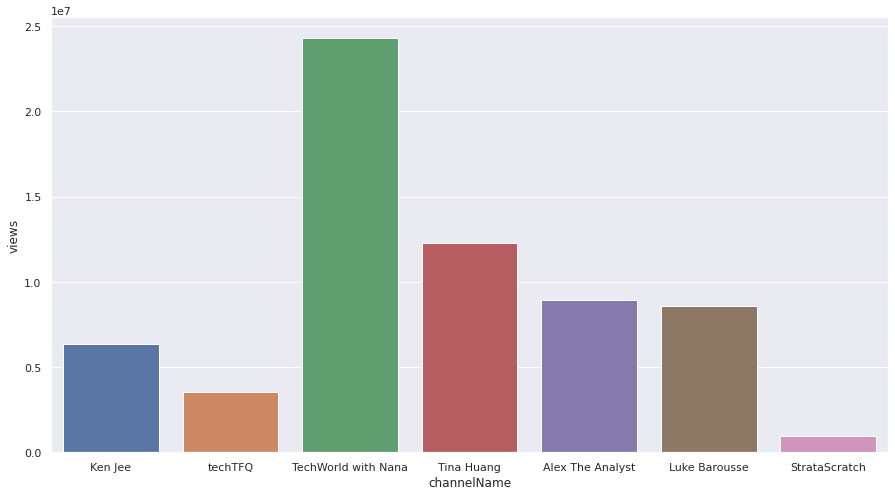

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x='channelName', y ='views',data= channel_data)

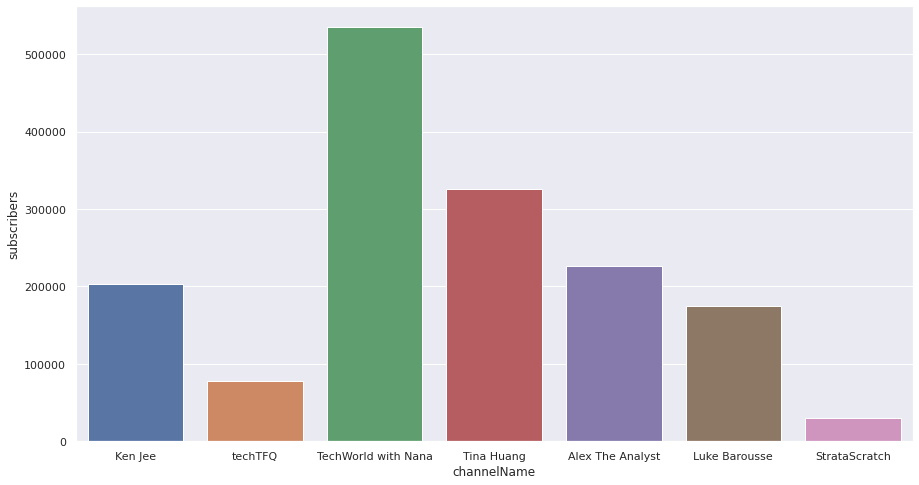

In [9]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x='channelName', y ='subscribers',data= channel_data)

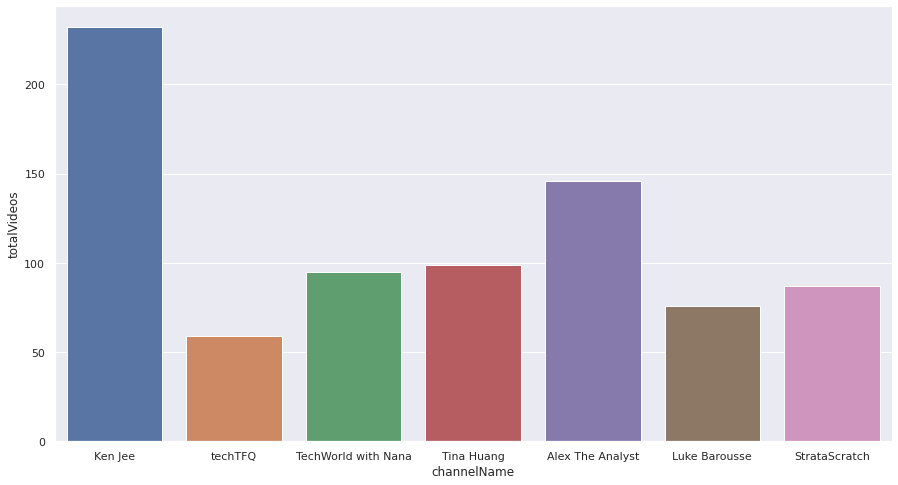

In [10]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x='channelName', y ='totalVideos',data= channel_data)

In [11]:
playlist_id = 'UUW8Ews7tdKKkBT6GdtQaXvQ'

In [12]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True,
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(part='contentDetails',
                                                       playlistId = playlist_id,
                                                       maxResults = 50,
                                                       pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
                    
    return video_ids

In [13]:
video_ids = get_video_ids(youtube,playlist_id)
video_ids

['tnoOz6MzTPg',
 'OzyHfddLj9g',
 'jN5hpgBrz8k',
 'yFyyP_Uvxj0',
 'Av92CaPTRr8',
 'VEjxlKBkZGM',
 'hMUf7DqG1nQ',
 'ToEl_tpyoM4',
 '30hS-MjpU6E',
 'Bgpp99iz0I0',
 'GeJUvdkJKEc',
 'GGURenNfXI0',
 'PlpUo6bHsBQ',
 'uY2wfR8Dkqo',
 'yY7yau9j3xk',
 'i-E4pdU2qXM',
 'T1UhSuKqy3A',
 '2iE3JgNTwVU',
 'RgKMbpEylWA',
 'giGIPINLqJs',
 '77IVf0zgmwI',
 'xtbMCAVXDmU',
 'fklHBWow8vE',
 'tNXliLTlrV8',
 'XRwxYOhHdE8',
 'pV_mnZgzXEo',
 'c4Af2FcgamA',
 'QenwDm5oWdU',
 'TYHWv1vT0Pk',
 '0GpgMvyN0Fg',
 'VYeevsVj4fU',
 'vLjAG9eXkcU',
 'lG0PbUq4wkg',
 'j8kGqAAIhxA',
 'W_IERUwElkg',
 'eC7MdwKCCOE',
 'XBE09l-UYTE',
 'C0hk-dZ9XSE',
 'N0aHeKyNEto',
 'TDwy1lSjEZo',
 'EPUayNC5ku4',
 'wqBFgaMgFQA',
 'IKw0lkmBHNI',
 '_gy1o9UH2dQ',
 '7Q-2DEwHW7w',
 'pFwYjaeKFvQ',
 'iR8FDQyCtnw',
 '1SgHHQeRuxs',
 'UndSRKwsxKM',
 'S7gKkRxlk1U',
 'U9P4M4EPTgI',
 'rMoUoYxfBNk',
 '60NaEc7NP_U',
 '5-1ClCuQCIw',
 'rf2udE9q-SM',
 'wqxDfVdZ8wM',
 'SrqJuUNN62I',
 '-i9chjBSOqU',
 'HRzthi_FqAA',
 'DUgd48QYmfI',
 'iwIPnlCHlVQ',
 'mCXZXe-Na3s',
 'JHxojh

In [14]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                              )
            all_video_stats.append(video_stats)
    return all_video_stats

In [15]:
video_details = get_video_details(youtube, video_ids)

In [16]:
video_data = pd.DataFrame(video_details)
video_data.head()

,Title,Published_date,Views,Likes,Comments
0,Python cumsum() | Solving Python Optimization ...,2022-05-11T15:01:39Z,1764,53,7
1,How to Solve a SQL Interview Question Using WH...,2022-04-13T03:26:28Z,4975,112,10
2,Dealing With Python Date Manipulations In a Me...,2022-03-22T17:30:06Z,4505,140,21
3,How To Solve Data Science Probability Intervie...,2022-03-10T02:52:23Z,2630,80,4
4,How to use SQL window functions: RANK vs DENSE...,2022-03-02T09:35:11Z,3794,102,7


In [17]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Python cumsum() | Solving Python Optimization ...,2022-05-11,1764,53,7
1,How to Solve a SQL Interview Question Using WH...,2022-04-13,4975,112,10
2,Dealing With Python Date Manipulations In a Me...,2022-03-22,4505,140,21
3,How To Solve Data Science Probability Intervie...,2022-03-10,2630,80,4
4,How to use SQL window functions: RANK vs DENSE...,2022-03-02,3794,102,7
...,...,...,...,...,...
82,How to Use Google Colaboratory | Import a CSV ...,2020-05-02,2123,12,2
83,Interview Questions for SQL Joins and Subqueries,2020-02-01,1475,23,0
84,SQL Job Interview Mistakes #2,2019-09-15,1066,21,0
85,SQL Job Interview Mistakes #1,2019-08-03,7870,72,1


In [18]:
top10_videos = video_data.sort_values(by = 'Views',ascending = False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
26,The One and Only Data Science Project You Need,2021-02-24,198905,11775,256
40,SQL Coding Interview Question Using A Window F...,2020-11-19,62919,1816,132
36,SQL Window Functions on Data Science Interview...,2020-12-17,61973,2056,151
86,SQL Query Interview Questions And Answers From...,2019-06-26,42349,545,5
22,Working with APIs in Python [For Your Data Sci...,2021-04-02,41865,1896,120
34,SQL Case Statements For Data Science Interview...,2020-12-28,33982,1154,86
24,Facebook's Most Common Data Science SQL Interv...,2021-03-10,33818,805,54
27,Advanced Data Science SQL Interview Question [...,2021-02-17,25109,807,106
43,Hard SQL Interview Question From FACEBOOK | Da...,2020-11-04,23081,497,72
12,Advanced Facebook Data Science SQL interview q...,2021-08-09,22056,650,66


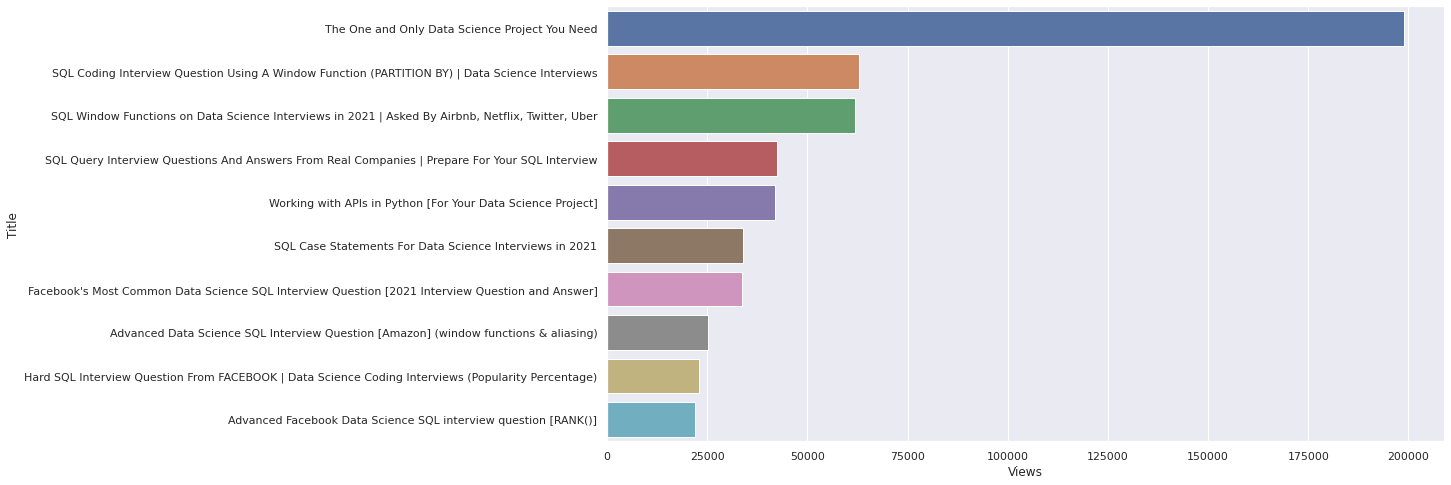

In [19]:
ax1 = sns.barplot(x = 'Views',y='Title',data = top10_videos)

In [20]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.month
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Python cumsum() | Solving Python Optimization ...,2022-05-11,1764,53,7,5
1,How to Solve a SQL Interview Question Using WH...,2022-04-13,4975,112,10,4
2,Dealing With Python Date Manipulations In a Me...,2022-03-22,4505,140,21,3
3,How To Solve Data Science Probability Intervie...,2022-03-10,2630,80,4,3
4,How to use SQL window functions: RANK vs DENSE...,2022-03-02,3794,102,7,3
...,...,...,...,...,...,...
82,How to Use Google Colaboratory | Import a CSV ...,2020-05-02,2123,12,2,5
83,Interview Questions for SQL Joins and Subqueries,2020-02-01,1475,23,0,2
84,SQL Job Interview Mistakes #2,2019-09-15,1066,21,0,9
85,SQL Job Interview Mistakes #1,2019-08-03,7870,72,1,8


In [21]:
videos_per_month = video_data.groupby('Month',as_index = False).size()
videos_per_month

,Month,size
0,1,6
1,2,6
2,3,6
3,4,3
4,5,30
5,6,3
6,7,3
7,8,6
8,9,6
9,10,6


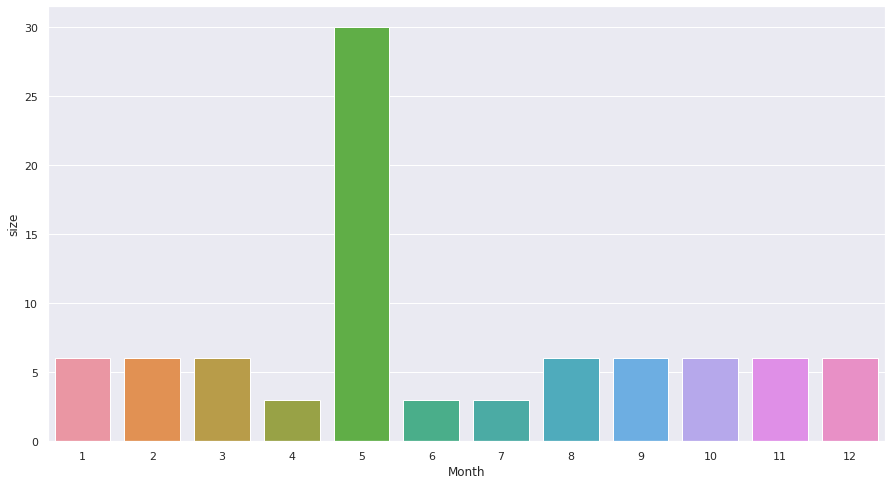

In [22]:
ax2 = sns.barplot(x= 'Month', y = 'size',data = videos_per_month)

# END